<a href="https://colab.research.google.com/github/boradj/Time-series-ML/blob/main/HAR_model/gru3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
#This will prompt for authorization # to take permission from user to use google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This is important!
import os
os.environ['TF_ENABLE_CONTROL_FLOW_V2'] = '1'

import tensorflow as tf
import numpy as np

In [ ]:
# load a file into memory
df=pd.read_csv('/content/drive/My Drive/data/new1/DataSet/data.csv')
df.head()

,Unnamed: 0,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,Activity
0,0,4.590100,-2.0431,2.65600,0.76963,6.937000,3.6223,0.47495,-1.2327,-0.118810,walking
1,1,3.732000,-2.4517,1.93410,-0.30694,6.452800,2.6874,1.84180,-0.6970,-0.845740,walking
2,2,0.054481,-8.9622,4.15420,-3.69680,0.098022,4.2580,2.29650,-2.2110,-0.991430,walking
3,3,-6.565000,-18.6730,7.54570,-9.12310,-9.227100,6.9194,3.26630,-4.1267,0.054978,walking
4,4,-2.029400,-11.1960,-0.84446,-3.31990,-1.507200,-1.6408,3.28890,-3.4725,0.760220,walking


In [ ]:
print(df.shape)

(540000, 11)


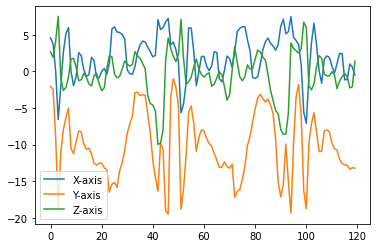

In [ ]:
# change in values while walking

plt.plot(np.arange(0,120),df.Ax[df['Activity']=="walking"][:120], label='X-axis')
plt.plot(np.arange(0,120),df.Ay[df['Activity']=="walking"][:120], label='Y-axis')
plt.plot(np.arange(0,120),df.Az[df['Activity']=="walking"][:120], label='Z-axis')
plt.legend()

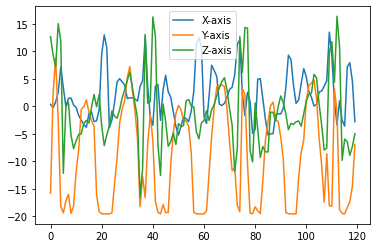

In [ ]:
# change in values while jogging

plt.plot(np.arange(0,120),df.Ax[df['Activity']=="jogging"][:120], label='X-axis')
plt.plot(np.arange(0,120),df.Ay[df['Activity']=="jogging"][:120], label='Y-axis')
plt.plot(np.arange(0,120),df.Az[df['Activity']=="jogging"][:120], label='Z-axis')
plt.legend()

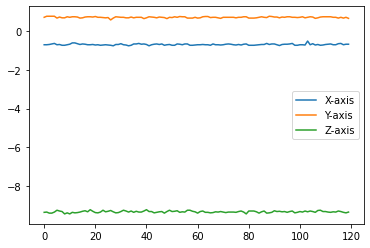

In [ ]:
# change in values while sitting

plt.plot(np.arange(0,120),df.Ax[df['Activity']=="sitting"][:120], label='X-axis')
plt.plot(np.arange(0,120),df.Ay[df['Activity']=="sitting"][:120], label='Y-axis')
plt.plot(np.arange(0,120),df.Az[df['Activity']=="sitting"][:120], label='Z-axis')
plt.legend()

In [ ]:
df.Activity.unique()

array(['walking', 'jogging', 'sitting'], dtype=object)

In [ ]:
df['Activity'].value_counts()

walking    180000
jogging    180000
sitting    180000
Name: Activity, dtype: int64

In [ ]:
df3 = df
df3.drop('Lx', inplace=True, axis=1)

In [ ]:
df3.drop('Ly', inplace=True, axis=1)
df3.drop('Lz', inplace=True, axis=1)

In [ ]:
df3

,Unnamed: 0,Ax,Ay,Az,Gx,Gy,Gz,Activity
0,0,4.590100,-2.04310,2.65600,0.474950,-1.232700,-0.118810,walking
1,1,3.732000,-2.45170,1.93410,1.841800,-0.697000,-0.845740,walking
2,2,0.054481,-8.96220,4.15420,2.296500,-2.211000,-0.991430,walking
3,3,-6.565000,-18.67300,7.54570,3.266300,-4.126700,0.054978,walking
4,4,-2.029400,-11.19600,-0.84446,3.288900,-3.472500,0.760220,walking
...,...,...,...,...,...,...,...,...
539995,35995,-2.220100,-0.96704,-9.47980,0.013744,0.019242,0.003665,sitting
539996,35996,-2.192900,-1.00790,-9.49340,0.016493,0.025351,0.004276,sitting
539997,35997,-2.220100,-1.00790,-9.47980,0.015882,0.021686,0.004276,sitting
539998,35998,-2.220100,-0.95342,-9.54790,0.010996,0.023518,0.004276,sitting


In [ ]:
df5 = df3

In [ ]:
df4 = df3[:300]

In [ ]:
print(df5.shape)

(540000, 8)


In [ ]:
X_train = df3[df3.columns[1:7]]
y_train = df3[df3.columns[7:8]]

In [ ]:
df4 = df3[:300]

In [ ]:
df4.shape

(300, 8)

In [ ]:
df5.append(df4,ignore_index=True)

,Unnamed: 0,Ax,Ay,Az,Gx,Gy,Gz,Activity
0,0,4.590100,-2.0431,2.65600,0.47495,-1.23270,-0.118810,walking
1,1,3.732000,-2.4517,1.93410,1.84180,-0.69700,-0.845740,walking
2,2,0.054481,-8.9622,4.15420,2.29650,-2.21100,-0.991430,walking
3,3,-6.565000,-18.6730,7.54570,3.26630,-4.12670,0.054978,walking
4,4,-2.029400,-11.1960,-0.84446,3.28890,-3.47250,0.760220,walking
...,...,...,...,...,...,...,...,...
540295,295,-4.154200,-14.6690,1.41650,3.08000,-3.69120,0.506710,walking
540296,296,0.231550,-10.1880,-2.24740,2.41480,-1.53910,0.597730,walking
540297,297,5.298300,-6.0066,-2.02940,2.40620,-0.51007,-0.143550,walking
540298,298,5.761400,-4.5764,-0.39499,1.85730,-0.13592,-0.943180,walking


In [ ]:
df5.shape

(540000, 8)

In [ ]:
X_train

,Ax,Ay,Az,Gx,Gy,Gz
0,4.590100,-2.04310,2.65600,0.474950,-1.232700,-0.118810
1,3.732000,-2.45170,1.93410,1.841800,-0.697000,-0.845740
2,0.054481,-8.96220,4.15420,2.296500,-2.211000,-0.991430
3,-6.565000,-18.67300,7.54570,3.266300,-4.126700,0.054978
4,-2.029400,-11.19600,-0.84446,3.288900,-3.472500,0.760220
...,...,...,...,...,...,...
539995,-2.220100,-0.96704,-9.47980,0.013744,0.019242,0.003665
539996,-2.192900,-1.00790,-9.49340,0.016493,0.025351,0.004276
539997,-2.220100,-1.00790,-9.47980,0.015882,0.021686,0.004276
539998,-2.220100,-0.95342,-9.54790,0.010996,0.023518,0.004276


In [ ]:
y_train

,Activity
0,walking
1,walking
2,walking
3,walking
4,walking
...,...
539995,sitting
539996,sitting
539997,sitting
539998,sitting


In [ ]:
y_train.Activity.unique()

array(['walking', 'jogging', 'sitting'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_train[:10]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
import scipy.stats as stats

In [ ]:
segments = []
labels = []

for i in range(0, len(df3) - 600, 600):
    
    
    x = df3['Ax'].values[i: i + 600]
    y = df3['Ay'].values[i: i + 600]
    z = df3['Az'].values[i: i + 600]
    a = df3['Gx'].values[i: i + 600]
    b = df3['Gy'].values[i: i + 600]
    c = df3['Gz'].values[i: i + 600]
    
    label = stats.mode(df3['Activity'][i: i + 600])[0][0]
    
    segments.append([x, y, z, a, b, c])
    
    labels.append(label)

# reshape the segments which is(list of arrays) to a list

reshaped_segments = np.asarray(segments, dtype = np.float32).reshape(-1, 600, 6)

labels = np.asarray(pd.get_dummies(labels), dtype=np.float32)

In [ ]:
s1 = segments[0]

In [ ]:
print(reshaped_segments)

[[[ 4.5901e+00  3.7320e+00  5.4481e-02 -6.5650e+00 -2.0294e+00
    2.6287e+00]
  [ 5.1349e+00  5.9930e+00  2.7241e-02 -1.9477e+00 -7.0826e-01
    2.5742e+00]
  [ 2.1793e+00  2.3155e-01 -6.9464e-01 -4.4947e-01  1.9341e+00
    1.4982e+00]
  ...
  [-6.6340e-01 -4.4440e-01 -3.0207e-01 -7.0769e-01 -8.5399e-01
   -2.8405e-01]
  [ 2.7764e-01  5.5070e-01  1.0996e-02 -8.5094e-01 -2.7794e-01
   -6.8722e-02]
  [-8.2467e-02 -2.4771e-01 -4.4074e-01 -5.6841e-01 -6.2736e-01
   -6.0659e-01]]

 [[ 1.3076e+00  2.5470e+00  1.0488e+00 -1.3893e+00 -1.3484e+00
    9.5342e-01]
  [ 1.4165e+00  6.6740e-01  1.4846e+00  3.1327e+00  5.7069e+00
    6.0066e+00]
  [ 6.4560e+00  6.1292e+00  5.6388e+00  1.6344e+00  5.4481e-02
   -7.3550e-01]
  ...
  [ 5.9712e-01 -6.4141e-01 -8.4941e-01 -3.1765e-01 -8.2772e-02
   -2.5198e-01]
  [-4.2944e-01 -5.9040e-01 -6.8142e-01 -6.5027e-01 -5.6352e-01
   -5.1496e-01]
  [-3.5919e-01 -2.4832e-01  1.4661e-02  1.1179e-01  2.6664e-01
    4.9908e-01]]

 [[ 1.3076e+00  4.3994e+00  6.4833e+

In [ ]:
reshaped_segments.shape, labels.shape

((899, 600, 6), (899, 3))

In [ ]:
print(labels)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
from  sklearn.model_selection import train_test_split
random_seed = 42

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(reshaped_segments, labels, test_size=0.2, random_state=random_seed)

In [ ]:
X_train1.shape, X_test1.shape,y_train1.shape, y_test1.shape

((719, 600, 6), (180, 600, 6), (719, 3), (180, 3))

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Flatten, Dropout
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten, LSTM
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [ ]:
model=Sequential()
model.add(LSTM(32, return_sequences=True, input_shape = (X_train1.shape[1],X_train1.shape[2]),
              kernel_regularizer = l2(0.000001), bias_regularizer = l2(0.000001), name='lstm_1'))
model.add(Flatten(name='flatten'))
model.add(Dense(64, activation='relu',kernel_regularizer = l2(0.000001), bias_regularizer = l2(0.000001), name='dense_1' ))
model.add(Dense(len(np.unique(y_train)), activation='softmax', 
                kernel_regularizer = l2(0.000001), bias_regularizer = l2(0.000001), name='output'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 300, 32)           4992      
                                                                 
 flatten (Flatten)           (None, 9600)              0         
                                                                 
 dense_1 (Dense)             (None, 64)                614464    
                                                                 
 output (Dense)              (None, 3)                 195       
                                                                 
Total params: 619,651
Trainable params: 619,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
# prepare callbacks
from keras.callbacks import ModelCheckpoint

callbacks= [ModelCheckpoint('model.h5', save_weights_only=False, save_best_only=True, verbose=1)]

In [ ]:
history = model.fit(X_train1, y_train1, epochs=20, validation_data=(X_test1,y_test1), batch_size=20, verbose=1,callbacks=callbacks)

Epoch 1/20
72/72 [==============================] - ETA: 0s - loss: 0.0519 - accuracy: 0.9792
Epoch 1: val_loss improved from inf to 0.00075, saving model to model.h5
72/72 [==============================] - 12s 127ms/step - loss: 0.0519 - accuracy: 0.9792 - val_loss: 7.4794e-04 - val_accuracy: 1.0000
Epoch 2/20
72/72 [==============================] - ETA: 0s - loss: 3.3448e-04 - accuracy: 1.0000
Epoch 2: val_loss improved from 0.00075 to 0.00056, saving model to model.h5
72/72 [==============================] - 8s 114ms/step - loss: 3.3448e-04 - accuracy: 1.0000 - val_loss: 5.6232e-04 - val_accuracy: 1.0000
Epoch 3/20
72/72 [==============================] - ETA: 0s - loss: 2.6918e-04 - accuracy: 1.0000
Epoch 3: val_loss improved from 0.00056 to 0.00046, saving model to model.h5
72/72 [==============================] - 8s 113ms/step - loss: 2.6918e-04 - accuracy: 1.0000 - val_loss: 4.5699e-04 - val_accuracy: 1.0000
Epoch 4/20
72/72 [==============================] - ETA: 0s - loss: 2

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01)

In [ ]:
# Building Model Architecture

model = Sequential()

# RNN layer

#model.add(LSTM(units=128, input_shape=(X_train.shape[1],X_train.shape[2] )))

model.add(GRU(units=512, input_shape=(X_train1.shape[1],X_train1.shape[2] )))

# Dropout layer

model.add(Dropout(0.5))

# Dense layer with ReLu
model.add(Dense(units=256, activation='relu'))
model.add(Flatten(name='flatten1'))
model.add(Dense(units=128, activation='sigmoid'))

# Softmax layer

model.add(Dense(y_train1.shape[1], activation='softmax'))

# Compile model

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 512)               798720    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 flatten1 (Flatten)          (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 963,331
Trainable params: 963,331
Non-trai

In [ ]:
model1 = Sequential()
model1.add(GRU(units=64, input_shape=(X_train1.shape[1],X_train1.shape[2]), return_sequences = True))
model1.add(GRU(units=32, return_sequences = True))
model1.add(Dropout(0.2))
model1.add(Dense(32, activation = 'relu'))
model1.add(GRU(units=16))
model1.add(Dense(units=16, activation='relu'))
model1.add(Dense(y_train1.shape[1], activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 600, 64)           13824     
                                                                 
 gru_4 (GRU)                 (None, 600, 32)           9408      
                                                                 
 dropout_1 (Dropout)         (None, 600, 32)           0         
                                                                 
 dense_3 (Dense)             (None, 600, 32)           1056      
                                                                 
 gru_5 (GRU)                 (None, 16)                2400      
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 3)                

In [ ]:
# prepare callbacks
from keras.callbacks import ModelCheckpoint

callbacks= [ModelCheckpoint('model.h5', save_weights_only=False, save_best_only=True, verbose=1)]

In [ ]:
#history = model1.fit_generator(train_gen, epochs=20, validation_data=test_gen, callbacks=callbacks)
history = model1.fit(X_train1, y_train1, epochs=20, validation_data=(X_test1,y_test1), batch_size=3, verbose=1,callbacks=callbacks)

Epoch 1/20
240/240 [==============================] - ETA: 0s - loss: 1.0709 - accuracy: 0.4242
Epoch 1: val_loss improved from inf to 1.03729, saving model to model.h5
240/240 [==============================] - 141s 566ms/step - loss: 1.0709 - accuracy: 0.4242 - val_loss: 1.0373 - val_accuracy: 0.6722
Epoch 2/20
240/240 [==============================] - ETA: 0s - loss: 0.9793 - accuracy: 0.6495
Epoch 2: val_loss improved from 1.03729 to 0.87668, saving model to model.h5
240/240 [==============================] - 136s 566ms/step - loss: 0.9793 - accuracy: 0.6495 - val_loss: 0.8767 - val_accuracy: 0.8667
Epoch 3/20
240/240 [==============================] - ETA: 0s - loss: 0.7068 - accuracy: 0.8428
Epoch 3: val_loss improved from 0.87668 to 0.60975, saving model to model.h5
240/240 [==============================] - 134s 560ms/step - loss: 0.7068 - accuracy: 0.8428 - val_loss: 0.6098 - val_accuracy: 0.8556
Epoch 4/20
240/240 [==============================] - ETA: 0s - loss: 0.4484 - a

In [ ]:
X_test123 = X_test1

In [ ]:
X_test1234 = np.split(X_test123,18,axis=0)

In [ ]:
X_test1234.append(X_test1234)

In [ ]:
elon_array = np.array(X_test1234)

In [ ]:
elon_array.shape

(18, 20, 300, 6)

In [ ]:
print(type(elon_array))

<class 'numpy.ndarray'>


In [ ]:
reshaped = reshaped_segments

In [ ]:
print(reshaped)

[[[ 4.5901e+00  3.7320e+00  5.4481e-02 -6.5650e+00 -2.0294e+00
    2.6287e+00]
  [ 5.1349e+00  5.9930e+00  2.7241e-02 -1.9477e+00 -7.0826e-01
    2.5742e+00]
  [ 2.1793e+00  2.3155e-01 -6.9464e-01 -4.4947e-01  1.9341e+00
    1.4982e+00]
  ...
  [ 2.6573e-01  2.3488e-01  2.5229e-01 -8.3078e-02 -2.9627e-02
    1.9334e-01]
  [-1.8815e-01 -7.2815e-01 -1.7685e-01 -6.0934e-01 -9.1477e-01
   -6.3072e-01]
  [ 3.9370e-01  5.0671e-01  5.9773e-01 -1.4355e-01 -9.4318e-01
   -3.9706e-01]]

 [[-1.0896e+00  1.1577e+00  2.1248e+00  1.3620e+00  1.0079e+00
    2.8603e-01]
  [-5.9930e-01  1.2803e+00  2.7786e+00 -4.7671e-01 -1.2122e+00
   -7.8998e-01]
  [ 4.0861e-01  7.0826e-01  1.5800e+00  3.1054e+00  6.4833e+00
    6.3198e+00]
  ...
  [-6.6340e-01 -4.4440e-01 -3.0207e-01 -7.0769e-01 -8.5399e-01
   -2.8405e-01]
  [ 2.7764e-01  5.5070e-01  1.0996e-02 -8.5094e-01 -2.7794e-01
   -6.8722e-02]
  [-8.2467e-02 -2.4771e-01 -4.4074e-01 -5.6841e-01 -6.2736e-01
   -6.0659e-01]]

 [[ 1.3076e+00  2.5470e+00  1.0488e+

In [ ]:
r1 = reshaped[0]

In [ ]:
reshaped3 = np.array(reshaped)

In [ ]:
r1 = reshaped3[0]
reshaped3.append(r1)

AttributeError: ignored

In [ ]:
print(type(reshaped3))

<class 'numpy.ndarray'>


In [ ]:
reshaped1 = np.split(reshaped,18,axis=0)
elon2 = np.array(reshaped1)
 

ValueError: ignored

In [ ]:
elon2.shape

In [ ]:
elon_array

array([[[[ 5.9930e+00,  1.8387e+00, -9.1256e-01, -9.1256e-01,
          -7.3822e+00, -7.7091e+00],
         [-5.7205e-01, -2.2474e+00, -5.7069e+00, -4.2904e+00,
           2.9965e-01, -1.7706e-01],
         [-1.9341e+00, -4.3994e+00, -3.5822e+00, -2.2882e+00,
          -2.0839e+00, -1.7162e+00],
         ...,
         [ 1.2394e+00,  1.4997e+00,  9.8074e-01,  4.2302e-01,
          -2.2602e-01, -7.7152e-01],
         [-1.0684e+00, -1.3534e+00, -2.2196e+00, -3.2617e+00,
          -3.4083e+00, -2.1622e+00],
         [-1.1790e+00, -1.5708e+00, -1.7929e+00, -9.0103e-01,
          -3.9859e-01,  3.0299e-01]],

        [[-1.4655e+01,  7.8317e+00, -1.3484e+01, -1.2708e+01,
           6.6740e+00,  7.8317e+00],
         [-1.9205e+00, -1.8101e+01, -1.9259e+01, -1.8319e+01,
          -1.1605e+01, -1.2858e+01],
         [-1.0120e+01, -8.0224e+00, -6.7966e+00, -5.6116e+00,
          -4.5356e+00, -4.4675e+00],
         ...,
         [ 5.1893e-01,  2.0217e+00,  3.1062e-01, -1.9303e-01,
           6.7501

In [ ]:
X_test1.shape

(360, 300, 6)

(300, 6)

In [ ]:
BATCH_SIZE = 20
STEPS = 50*12
INPUT_SIZE = 6
run_model = tf.function(lambda x: model1(x))
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE, STEPS, INPUT_SIZE], model1.inputs[0].dtype))

In [ ]:
# model directory.
MODEL_DIR = "keras_lstm"
model1.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

INFO:tensorflow:Assets written to: keras_lstm/assets


INFO:tensorflow:Assets written to: keras_lstm/assets


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
tflite_model = converter.convert()

In [ ]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('keras_lstm') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  
  f.write(tflite_model)

In [ ]:
interpreter = tf.lite.Interpreter(model_path="lstm.tflite")
interpreter.allocate_tensors()

In [ ]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
print(input_details)
print(output_details)

[{'name': 'serving_default_x:0', 'index': 0, 'shape': array([ 20, 300,   6], dtype=int32), 'shape_signature': array([ 20, 300,   6], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 24, 'shape': array([20,  3], dtype=int32), 'shape_signature': array([20,  3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[8.3898951e-04 1.7619802e-02 9.8154128e-01]
 [6.9071009e-04 2.4458671e-02 9.7485059e-01]
 [9.5726951e-04 2.4106288e-02 9.7493637e-01]
 [7.9092116e-04 3.1018974e-02 9.6819007e-01]
 [8.9216372e-04 2.7345052e-02 9.7176290e-01]
 [1.2438236e-03 2.9007606e-02 9.6974868e-01]
 [6.3008611e-04 2.3735311e-02 9.7563452e-01]
 [8.3551364e-04 2.8973658e-02 9.7019088e-01]
 [8.1995095e-04 2.7918108e-02 9.7126198e-01]
 [1.0172051e-03 2.4747534e-02 9.7423530e-01]
 [8.2072080e-04 2.7411763e-02 9.7176749e-01]
 [6.5215293e-04 2.4431681e-02 9.7491622e-01]
 [8.0813747e-04 2.1624478e-02 9.7756732e-01]
 [9.2641119e-04 2.0802397e-02 9.7827119e-01]
 [1.1719592e-03 3.4670345e-02 9.6415764e-01]
 [7.8267098e-04 2.7305754e-02 9.7191161e-01]
 [8.4334170e-04 2.2977244e-02 9.7617948e-01]
 [7.0209091e-04 1.8373424e-02 9.8092449e-01]
 [6.6601561e-04 2.2779230e-02 9.7655475e-01]
 [5.3505553e-04 2.1594992e-02 9.7786987e-01]]


In [ ]:
input_shape = ''
output_shape = ''
interpreter = ''


In [ ]:
def predict(x):
  interpreter.set_tensor(input_shape[0]['index'], x)
  interpreter.invoke()
  output_data = interpreter.get_tensor(output_shape[0]['index'])
  Predicted_class = output_data
  return Predicted_class

In [ ]:
def Load_Model():
  global input_shape
  global output_shape
  global interpreter
  interpreter = tf.lite.Interpreter(model_path="lstm.tflite")
  interpreter.allocate_tensors()
  input_shape = interpreter.get_input_details()
  output_shape = interpreter.get_output_details()


In [ ]:
Load_Model()

In [ ]:
for i in range(0,19):
  j = y[i]
  



In [ ]:
y = []
for i in range(0,17):
  x = elon_array[i]
  y = predict(x)
  for i in range(0,19):
    r = y[i]
    a = "jogging"
    b = "sitting"
    c = "walking"

    if r[0] > r[1]:
      if r[0] > r[2]:
        print(a) 
      else:
        print(c)
    else:
      if r[1] > r[2]:
        print(b)
      else:
        print(c)

jogging
jogging
jogging
sitting
sitting
sitting
sitting
jogging
walking
walking
jogging
jogging
jogging
walking
walking
jogging
sitting
sitting
sitting
jogging
walking
walking
jogging
jogging
jogging
sitting
sitting
jogging
walking
walking
jogging
walking
walking
sitting
sitting
walking
walking
jogging
walking
jogging
walking
walking
walking
walking
jogging
sitting
sitting
sitting
sitting
jogging
jogging
walking
sitting
jogging
walking
walking
walking
walking
walking
jogging
jogging
sitting
walking
jogging
sitting
walking
sitting
sitting
jogging
walking
sitting
jogging
walking
sitting
jogging
sitting
sitting
jogging
jogging
walking
sitting
walking
walking
walking
walking
sitting
jogging
jogging
walking
jogging
sitting
jogging
jogging
sitting
walking
jogging
walking
jogging
jogging
jogging
walking
jogging
jogging
jogging
jogging
walking
sitting
walking
jogging
walking
sitting
walking
sitting
jogging
walking
sitting
walking
jogging
sitting
walking
walking
sitting
jogging
walking
sitting


In [ ]:
print(y)

[[5.2556084e-07 3.6291010e-09 9.9999952e-01]
 [3.5508529e-10 1.0000000e+00 5.4796161e-14]
 [7.4221525e-11 1.0000000e+00 1.8720709e-14]
 [9.9999988e-01 7.2797324e-11 1.6357477e-07]
 [2.6750038e-09 1.0000000e+00 1.3695481e-13]
 [7.1869705e-10 1.0000000e+00 3.1831788e-12]
 [2.6198566e-11 1.0000000e+00 6.6672864e-15]
 [1.1611616e-09 1.0000000e+00 3.5045453e-11]
 [9.9999988e-01 1.7881048e-10 1.6992708e-07]
 [6.9580456e-05 1.3325486e-05 9.9991703e-01]
 [1.0271690e-05 3.9885242e-09 9.9998975e-01]
 [7.7782331e-10 1.0000000e+00 2.4093891e-12]
 [9.9999952e-01 4.3915788e-10 5.2761430e-07]
 [1.8571934e-11 1.0000000e+00 8.7766962e-15]
 [9.9999988e-01 4.9066246e-10 1.3289430e-07]
 [7.9610618e-06 2.1998601e-09 9.9999201e-01]
 [1.8425280e-09 1.0000000e+00 6.9156434e-12]
 [4.2245225e-07 3.2819711e-10 9.9999952e-01]
 [2.7552335e-11 1.0000000e+00 6.8101042e-15]
 [3.3602721e-09 1.0000000e+00 9.6857994e-14]]


In [ ]:
r = y[0]
a = "jogging"
b = "sitting"
c = "walking"

if r[0] > r[1]:
  if r[0] > r[2]:
    print(a) 
  else:
    print(c)
else:
  if r[1] > r[2]:
    print(b)
  else:
    print(c)

walking


In [ ]:
for i in range(0,19):
  r = y[i]
  a = "jogging"
  b = "sitting"
  c = "walking"

  if r[0] > r[1]:
    if r[0] > r[2]:
      print(a) 
    else:
      print(c)
  else:
    if r[1] > r[2]:
      print(b)
    else:
      print(c)

walking
sitting
sitting
jogging
sitting
sitting
sitting
sitting
jogging
walking
walking
sitting
jogging
sitting
jogging
walking
sitting
walking
sitting


In [ ]:
for i in range(0,20):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [ ]:
print(x)

In [ ]:
#Load partly trained model
from keras.models import load_model
model3 = load_model('model.h5')


In [ ]:
# prepare callbacks
from keras.callbacks import ModelCheckpoint

callbacks= [ModelCheckpoint('model1.h5', save_weights_only=False, save_best_only=True, verbose=1)]

In [ ]:
history = model3.fit(X_train1, y_train1, epochs=20, validation_data=(X_test1,y_test1), batch_size=1, verbose=1,callbacks=callbacks)

Epoch 1/20
287/287 [==============================] - ETA: 0s - loss: 0.4680 - accuracy: 0.6690
Epoch 1: val_loss improved from inf to 0.39452, saving model to model1.h5
287/287 [==============================] - 282s 975ms/step - loss: 0.4680 - accuracy: 0.6690 - val_loss: 0.3945 - val_accuracy: 0.7778
Epoch 2/20
287/287 [==============================] - ETA: 0s - loss: 0.4697 - accuracy: 0.6655
Epoch 2: val_loss did not improve from 0.39452
287/287 [==============================] - 270s 940ms/step - loss: 0.4697 - accuracy: 0.6655 - val_loss: 0.4001 - val_accuracy: 0.7917
Epoch 3/20
287/287 [==============================] - ETA: 0s - loss: 0.4650 - accuracy: 0.6829
Epoch 3: val_loss improved from 0.39452 to 0.39052, saving model to model1.h5
287/287 [==============================] - 266s 929ms/step - loss: 0.4650 - accuracy: 0.6829 - val_loss: 0.3905 - val_accuracy: 0.7778
Epoch 4/20
287/287 [==============================] - ETA: 0s - loss: 0.4647 - accuracy: 0.6934
Epoch 4: val

In [ ]:
history = model.fit(X_train1, y_train1, epochs=5, validation_data=(X_test1,y_test1), batch_size=50, verbose=1)

Epoch 1/5
6/6 [==============================] - 78s 13s/step - loss: 1.2621 - accuracy: 0.3380 - val_loss: 1.2842 - val_accuracy: 0.2500
Epoch 2/5
6/6 [==============================] - 74s 12s/step - loss: 1.1638 - accuracy: 0.3589 - val_loss: 1.1823 - val_accuracy: 0.2500
Epoch 3/5
6/6 [==============================] - 73s 12s/step - loss: 1.1202 - accuracy: 0.3275 - val_loss: 1.1433 - val_accuracy: 0.2500
Epoch 4/5
6/6 [==============================] - 72s 12s/step - loss: 1.1049 - accuracy: 0.3310 - val_loss: 1.1281 - val_accuracy: 0.2500
Epoch 5/5
6/6 [==============================] - 73s 12s/step - loss: 1.0994 - accuracy: 0.3554 - val_loss: 1.1176 - val_accuracy: 0.2500


In [ ]:
X_train = df3[df3.columns[:6]]
y_train = df3[df3.columns[6:7]]

In [ ]:
X_train

,Ax,Ay,Az,Gx,Gy,Gz
0,4.590100,-2.04310,2.65600,0.474950,-1.232700,-0.118810
1,3.732000,-2.45170,1.93410,1.841800,-0.697000,-0.845740
2,0.054481,-8.96220,4.15420,2.296500,-2.211000,-0.991430
3,-6.565000,-18.67300,7.54570,3.266300,-4.126700,0.054978
4,-2.029400,-11.19600,-0.84446,3.288900,-3.472500,0.760220
...,...,...,...,...,...,...
539995,-2.220100,-0.96704,-9.47980,0.013744,0.019242,0.003665
539996,-2.192900,-1.00790,-9.49340,0.016493,0.025351,0.004276
539997,-2.220100,-1.00790,-9.47980,0.015882,0.021686,0.004276
539998,-2.220100,-0.95342,-9.54790,0.010996,0.023518,0.004276


In [ ]:
y_train

,Activity
0,walking
1,walking
2,walking
3,walking
4,walking
...,...
539995,sitting
539996,sitting
539997,sitting
539998,sitting


In [ ]:
y_train.Activity.unique()

array(['walking', 'standing', 'sitting'], dtype=object)

In [ ]:
Cust_rating = {'sitting':0, 'walking': 1, 'standing': 3}


In [ ]:
y_train = y_train.Activity.map(Cust_rating)


In [ ]:
y_train

0         1
1         1
2         1
3         1
4         1
         ..
539995    0
539996    0
539997    0
539998    0
539999    0
Name: Activity, Length: 540000, dtype: int64

In [ ]:
print(y_train)

0         1
1         1
2         1
3         1
4         1
         ..
539995    0
539996    0
539997    0
539998    0
539999    0
Name: Activity, Length: 540000, dtype: int64


In [ ]:
y_train.to_csv('/content/df.csv')

In [ ]:
import scipy.stats as stats

In [ ]:
Fs = 50
frame_size = Fs*30 # 80
hop_size = Fs*30 # 40

In [ ]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 6

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['Ax'].values[i: i + frame_size]
        y = df['Ay'].values[i: i + frame_size]
        z = df['Az'].values[i: i + frame_size]
        a = df['Gx'].values[i: i + frame_size]
        b = df['Gy'].values[i: i + frame_size]
        c = df['Gz'].values[i: i + frame_size]
         
        
        # Retrieve the most often used label in this segment
        global label
        label = stats.mode(df['Activity'][i: i + frame_size])[0][0]
        frames.append([x, y, z, a, b, c])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [ ]:
X, y = get_frames(df3, frame_size, hop_size)

In [ ]:
print(y)

['walking' 'walking' 'walking' 'walking' 'walking' 'walking' 'standing'
 'standing' 'standing' 'standing' 'standing' 'standing' 'sitting'
 'sitting' 'sitting' 'sitting' 'sitting' 'sitting' 'walking' 'walking'
 'walking' 'walking' 'walking' 'walking' 'standing' 'standing' 'standing'
 'standing' 'standing' 'standing' 'sitting' 'sitting' 'sitting' 'sitting'
 'sitting' 'sitting' 'walking' 'walking' 'walking' 'walking' 'walking'
 'walking' 'standing' 'standing' 'standing' 'standing' 'standing'
 'standing' 'sitting' 'sitting' 'sitting' 'sitting' 'sitting' 'sitting'
 'walking' 'walking' 'walking' 'walking' 'walking' 'walking' 'standing'
 'standing' 'standing' 'standing' 'standing' 'standing' 'sitting'
 'sitting' 'sitting' 'sitting' 'sitting' 'sitting' 'walking' 'walking'
 'walking' 'walking' 'walking' 'walking' 'standing' 'standing' 'standing'
 'standing' 'standing' 'standing' 'sitting' 'sitting' 'sitting' 'sitting'
 'sitting' 'sitting' 'walking' 'walking' 'walking' 'walking' 'walking'
 'walk

In [ ]:
from pandas.core.frame import DataFrame
df4 = X[0]
df5  = DataFrame(df4)

In [ ]:
print(df5)

             0        1         2         3        4         5
0     4.590100  3.73200  0.054481 -6.565000 -2.02940  2.628700
1     5.134900  5.99300  0.027241 -1.947700 -0.70826  2.574200
2     2.179300  0.23155 -0.694640 -0.449470  1.93410  1.498200
3    -0.830840 -0.87170  0.027241  0.408610 -0.38137  1.130500
4     5.815900  6.08830  5.393700  5.311900  5.06680  4.467500
...        ...      ...       ...       ...      ...       ...
1495 -1.008800 -0.68661  0.282220  0.442270  0.63194 -0.039095
1496 -0.872010 -0.28100 -0.086743 -0.036346 -0.25962 -0.513130
1497 -0.777020 -0.88575 -0.714100 -0.576960 -0.50641 -0.362850
1498 -0.083994  0.15027  0.280390  0.348190  0.53665  0.722040
1499  0.624920  0.50335  0.546420  0.420580  0.38118  0.631630

[1500 rows x 6 columns]


In [ ]:
print(y)

[2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2
 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2
 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2
 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2
 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2
 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2
 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1
 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1
 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1
 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0]


In [ ]:
from pandas.core.frame import DataFrame
df4 = y
df5  = DataFrame(df4)

In [ ]:
print(df5[0])

0      2
1      2
2      2
3      2
4      2
      ..
354    0
355    0
356    0
357    0
358    0
Name: 0, Length: 359, dtype: int64


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df5)
print(transformed.toarray())

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
trasformed1 = transformed.toarray()

In [ ]:
trasformed1.shape

(359, 3)

In [ ]:
transformed2 = np.asarray(trasformed1, dtype = np.float32)

In [ ]:
transformed2

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
random_seed = 42
n_time_steps = 30
n_features = 6
step = 12
n_classes = 6
n_epochs = 50
batch_size = 5
learning_rate = 0.0025
l2_loss = 0.0015

In [ ]:
from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, transformed2, test_size=0.2, random_state=random_seed)

In [ ]:
y_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((287, 1500, 6), (72, 1500, 6), (287, 3), (72, 3))

In [ ]:
y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1

In [ ]:
X_test

array([[[ 2.4380e+00,  2.2882e+00,  2.1656e+00,  2.1384e+00,
          2.0567e+00,  2.0431e+00],
        [ 2.1248e+00,  2.1520e+00,  2.1520e+00,  2.1384e+00,
          2.2474e+00,  2.2201e+00],
        [ 2.1929e+00,  2.2882e+00,  2.2746e+00,  2.2474e+00,
          2.1520e+00,  2.0431e+00],
        ...,
        [ 9.7738e-03,  7.9412e-03, -2.1380e-03,  6.1100e-04,
          1.0079e-02,  6.7195e-03],
        [ 9.7738e-03,  7.6358e-03,  6.1087e-03,  3.3598e-03,
         -4.8869e-03,  1.5272e-03],
        [ 3.0543e-03,  1.8326e-03,  3.0543e-03,  2.4435e-03,
          4.2761e-03,  4.8869e-03]],

       [[-5.4073e+00, -5.4209e+00, -5.4618e+00, -5.3664e+00,
         -5.3800e+00, -5.3800e+00],
        [-5.3937e+00, -5.3800e+00, -5.3256e+00, -5.3664e+00,
         -5.4345e+00, -5.4754e+00],
        [-5.5707e+00, -5.5162e+00, -5.3800e+00, -5.2438e+00,
         -5.0123e+00, -4.8625e+00],
        ...,
        [ 1.5272e-03,  4.2761e-03,  7.3304e-03,  3.0543e-03,
          5.4978e-03,  6.7195e-03],
  

In [ ]:
X_train.shape[1],X_train.shape[2]

(1500, 6)

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Flatten, Dropout
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [ ]:
# Building Model Architecture

model = Sequential()

# RNN layer

#model.add(LSTM(units=128, input_shape=(X_train.shape[1],X_train.shape[2] )))

model.add(GRU(units=128, input_shape=(X_train.shape[1],X_train.shape[2] )))

# Dropout layer

model.add(Dropout(0.5))

# Dense layer with ReLu

model.add(Dense(units=64, activation='relu'))

# Softmax layer

model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 128)               52224     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 60,675
Trainable params: 60,675
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, verbose=1)

Epoch 1/50
58/58 [==============================] - 42s 687ms/step - loss: 0.9685 - accuracy: 0.5679
Epoch 2/50
58/58 [==============================] - 36s 625ms/step - loss: 0.6067 - accuracy: 0.5923
Epoch 3/50
58/58 [==============================] - 38s 658ms/step - loss: 0.4914 - accuracy: 0.6585
Epoch 4/50
58/58 [==============================] - 37s 631ms/step - loss: 0.4970 - accuracy: 0.6551
Epoch 5/50
58/58 [==============================] - 36s 626ms/step - loss: 0.4859 - accuracy: 0.6446
Epoch 6/50
58/58 [==============================] - 37s 643ms/step - loss: 0.4881 - accuracy: 0.6132
Epoch 7/50
58/58 [==============================] - 36s 627ms/step - loss: 0.4798 - accuracy: 0.6516
Epoch 8/50
58/58 [==============================] - 36s 626ms/step - loss: 0.4784 - accuracy: 0.6516
Epoch 9/50
58/58 [==============================] - 36s 621ms/step - loss: 0.4888 - accuracy: 0.6411
Epoch 10/50
58/58 [==============================] - 38s 652ms/step - loss: 0.4814 - accura

In [ ]:
from keras.layers import TimeDistributed, LSTM, Dense, GRU, Dropout, BatchNormalization, Flatten

In [ ]:
model1 = Sequential()
model1.add(GRU(256, dropout=0.2, recurrent_dropout=0.2, input_shape=(X_train.shape[1],X_train.shape[2])))
#model1.add(GRU(512,  dropout=0.3, recurrent_dropout=0.3)) 
model1.add(Dense(128, activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(Dense(64, activation = 'relu'))
#model1.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(64, activation = 'relu'))
model1.add(Dense(y_train.shape[1], activation='softmax', 
                name='output1'))

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_10 (GRU)                (None, 256)               202752    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 output1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 244,099
Trainable params: 244,099
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# prepare callbacks
from keras.callbacks import ModelCheckpoint

callbacks= [ModelCheckpoint('model.h5', save_weights_only=False, save_best_only=True, verbose=1)]

In [ ]:
history = model1.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), callbacks=callbacks)

Epoch 1/10
9/9 [==============================] - ETA: 0s - loss: 0.8176 - accuracy: 0.6446
Epoch 1: val_loss improved from inf to 0.63131, saving model to model.h5
9/9 [==============================] - 64s 7s/step - loss: 0.8176 - accuracy: 0.6446 - val_loss: 0.6313 - val_accuracy: 0.7917
Epoch 2/10
9/9 [==============================] - ETA: 0s - loss: 0.6030 - accuracy: 0.6481
Epoch 2: val_loss improved from 0.63131 to 0.41530, saving model to model.h5
9/9 [==============================] - 61s 7s/step - loss: 0.6030 - accuracy: 0.6481 - val_loss: 0.4153 - val_accuracy: 0.7500
Epoch 3/10
9/9 [==============================] - ETA: 0s - loss: 0.5507 - accuracy: 0.6167
Epoch 3: val_loss did not improve from 0.41530
9/9 [==============================] - 61s 7s/step - loss: 0.5507 - accuracy: 0.6167 - val_loss: 0.4289 - val_accuracy: 0.6528
Epoch 4/10
9/9 [==============================] - ETA: 0s - loss: 0.4877 - accuracy: 0.6794
Epoch 4: val_loss did not improve from 0.41530
9/9 [==

KeyboardInterrupt: ignored

In [ ]:
transformed.shape

(359, 3)

In [ ]:
Cust_rating1 = {2: 1, 1: 3 , 0: 0}


In [ ]:
df6 = df5
df6 = df6[0].map(Cust_rating1)

In [ ]:
print(df6)

0      1
1      1
2      1
3      1
4      1
      ..
354    0
355    0
356    0
357    0
358    0
Name: 0, Length: 359, dtype: int64


In [ ]:
c = df6.to_numpy()

In [ ]:
print(c)

[1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1
 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1
 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1
 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1
 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1
 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1
 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3
 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3
 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3
 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0]


In [ ]:
df6.to_csv('/content/df6.csv')

In [ ]:
X.shape

(359, 1500, 6)

In [ ]:
y = c

In [ ]:
print(y)

[1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1
 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1
 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1
 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1
 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1
 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1
 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3
 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3
 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3
 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0]


In [ ]:
X.shape, y.shape

((359, 1500, 6), (359,))

In [ ]:
for i in y:
  if i == 1:
    

In [ ]:
from  sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

print("X_train shape ", X_train.shape)
print("Y train shape ", y_train.shape)
print("X_test shape ", X_test.shape)
print("y_test shape ", y_test.shape)

X_train shape  (287, 1500, 6)
Y train shape  (287,)
X_test shape  (72, 1500, 6)
y_test shape  (72,)


In [ ]:
X_train[0].shape, X_test[0].shape

((1500, 6), (1500, 6))

In [ ]:
X_train1 = X_train.reshape(269, 1500, 6, 1)
X_test1 = X_test.reshape(90, 1500, 6, 1)

In [ ]:
X_train1[0].shape, X_test1[0].shape

((1500, 6, 1), (1500, 6, 1))

In [ ]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed, LSTM, Dense, GRU, Dropout, BatchNormalization, Flatten
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
model2 = Sequential()
model2.add(GRU(32,input_shape=X_train[0].shape, return_sequences = True, name='GRU_1'))



**GRU MODEL**
---

In [ ]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed, LSTM, Dense, GRU, Dropout, BatchNormalization, Flatten
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()
model.add(GRU(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(1500, 6), return_sequences = True, name='GRU_1'))
#model.add(GRU(64,  dropout=0.3, recurrent_dropout=0.3, return_sequences = True))
model.add(Flatten(name='flatten')) 
# model.add(Dense(256, activation = 'relu', ))
#model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu', name='dense_1'))
#model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(64, activation = 'relu'))
model.add(Dense(len(np.unique(y_train)), activation='softmax', 
                name='output'))

In [ ]:
model1 = Sequential()
model1.add(GRU(256, dropout=0.2, recurrent_dropout=0.2, input_shape=X_train[0].shape, return_sequences = True))
model1.add(GRU(512,  dropout=0.3, recurrent_dropout=0.3, return_sequences = True)) 
model1.add(Dense(256, activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(Dense(64, activation = 'relu'))
model1.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(64, activation = 'relu'))
model1.add(Dense(len(np.unique(y_train)), activation='softmax', 
                name='output1'))

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 GRU_1 (GRU)                 (None, 1500, 32)          3840      
                                                                 
 flatten (Flatten)           (None, 48000)             0         
                                                                 
 dense_1 (Dense)             (None, 8)                 384008    
                                                                 
 output (Dense)              (None, 3)                 27        
                                                                 
Total params: 387,875
Trainable params: 387,875
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 1500, 256)         202752    
                                                                 
 gru_13 (GRU)                (None, 1500, 512)         1182720   
                                                                 
 dense_10 (Dense)            (None, 1500, 256)         131328    
                                                                 
 dropout_4 (Dropout)         (None, 1500, 256)         0         
                                                                 
 dense_11 (Dense)            (None, 1500, 64)          16448     
                                                                 
 batch_normalization_4 (Batc  (None, 1500, 64)         256       
 hNormalization)                                                 
                                                     

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
history = model1.fit(X_train1, y_train1, epochs = 5)

NameError: ignored

In [ ]:
history = model1.fit(X_train1, y_train, epochs = 10, validation_data= (X_test1, y_test), verbose=1)

Epoch 1/10


ValueError: ignored

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
Fs = 50
time_interval = Fs*30
batchsize1 = int(405000/time_interval)
batchsize2 = int(135000/time_interval)
n_time_steps = Fs*6
n_features = 6

print(batchsize1)
print(batchsize2)

270
90


In [ ]:
train_gen = TimeseriesGenerator(X_train.to_numpy(), y_train, length=n_time_steps, batch_size=batchsize1)
test_gen = TimeseriesGenerator(X_test.to_numpy(), y_test, length=n_time_steps, batch_size=batchsize2)

AttributeError: ignored

In [ ]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed, LSTM, Dense, GRU, Dropout, BatchNormalization, Flatten
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()
model.add(GRU(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(n_time_steps, n_features), return_sequences = True, name='GRU_1'))
#model.add(GRU(64,  dropout=0.3, recurrent_dropout=0.3, return_sequences = True))
model.add(Flatten(name='flatten')) 
# model.add(Dense(256, activation = 'relu', ))
#model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu', name='dense_1'))
#model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(64, activation = 'relu'))
model.add(Dense(len(np.unique(y_train)), activation='softmax', 
                name='output'))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 GRU_1 (GRU)                 (None, 300, 32)           3840      
                                                                 
 flatten (Flatten)           (None, 9600)              0         
                                                                 
 dense_1 (Dense)             (None, 32)                307232    
                                                                 
 output (Dense)              (None, 3)                 99        
                                                                 
Total params: 311,171
Trainable params: 311,171
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
history = model1.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)

Epoch 1/10


ValueError: ignored

In [ ]:
#compile
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
# prepare callbacks
from keras.callbacks import ModelCheckpoint

callbacks= [ModelCheckpoint('model.h5', save_weights_only=False, save_best_only=True, verbose=1)]

In [ ]:
#history = model.fit_generator(train_gen, epochs=, validation_data=test_gen, callbacks=callbacks)
history = model.fit(train_gen, epochs = 2, validation_data=test_gen, callbacks=callbacks )

KeyError: ignored